In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/nlp-2021-vda/evaluate_models/
!pwd

/content/drive/MyDrive/nlp-2021-vda/evaluate_models
/content/drive/MyDrive/nlp-2021-vda/evaluate_models


If you want to run evaluation on our sampled responses, download data from google cloud storage.

In [5]:
import os
if not os.path.isdir('./sampled_responses'):
    !gsutil -m cp -r gs://nlp-lab/evaluation/sampled_responses ./

In [6]:
!pip install -U nltk

     |████████████████████████████████| 1.5MB 8.0MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [7]:
!pip install transformers

     |████████████████████████████████| 2.5MB 6.7MB/s 
     |████████████████████████████████| 901kB 52.6MB/s 
     |████████████████████████████████| 3.3MB 45.1MB/s 


When nltk.download opens choose 'Download' and as package 'stopwords'. Then choose quit.

In [8]:
import json
import nltk
nltk.download()
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt
import numpy as np
nltk.download('wordnet')

# Metric calculation 
from data import metrics
from data import parse_sampled_responses
from data import metric_averages_or_ratios

# For plotting
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Plot METEOR Score vs Training Step and Returns vs Training Step

In [9]:
path_list = ['supervised_0.7', 'run7_1', 'run7_2', 'run7_3', 'run7_4', 'run7_5', 'run7_6', 'run7_7', 'run7_8']
file_scores = []
gold_path = 'sampled_responses/policy-1/gold.json'

In [10]:
for path in path_list:
  with open(gold_path) as f:
    gold = json.load(f)

  with open(f"sampled_responses/policy-1/{path}.json") as f:
    data = json.load(f)
  scores = []
  for i in range(len(gold)):
    score = meteor_score([gold[i]['gold_response']], data[i]['sample0'])
    scores.append(score)
  file_scores.append(sum(scores) / len(scores))

In [11]:
x = [0, 25, 50, 75, 100, 125, 150, 175, 200]
returns = [0.99, 1.19, 1.28, 1.81, 2.2, 2.74, 3.08, 3.49, 3.57]

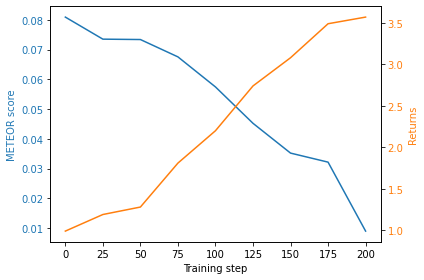

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Training step')
ax1.set_ylabel('METEOR score', color=color)
ax1.plot(x, file_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(x, returns, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Perplexity

# Utterance length

In [13]:
path_list = ['supervised_0.7', 'run7_1', 'run7_2', 'run7_3', 'run7_4', 'run7_5', 'run7_6', 'run7_7', 'run7_8']
x = [0, 25, 50, 75, 100, 125, 150, 175, 200]
gold_path = 'sampled_responses/policy-2/gold.json'

In [14]:
def getWordCountMetricDictFromFilename(file_name, metric_dict):
    parsed_conversations = parse_sampled_responses.getParsedConversations(f"sampled_responses/policy-1/{file_name}.json",'sample0')

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,metric_dict,metric_dict)
    return parsed_conversations_dict

def getGoldMetricDict(metric_dict):
    parsed_gold_conversations = parse_sampled_responses.getParsedConversations(gold_path,'gold_response')
    gold_metric = metric_averages_or_ratios.getMetricDict(parsed_gold_conversations,metric_dict,metric_dict)
    return gold_metric

In [15]:
utterance_length_dict = {}
utterance_length_metric_names = ['utterance_length']

gold_utterance_length = getGoldMetricDict(utterance_length_metric_names)

counter = 0
for path in path_list:
    utterance_length = getWordCountMetricDictFromFilename(path,utterance_length_metric_names)
    utterance_length_dict[x[counter]] = utterance_length['utterance_length']
    counter = counter + 1
    
print(utterance_length_dict)

Done! Parsed 8416 dialogs
Current Time = 22:26:35
0.07024776200000105
Current Time = 22:26:35
Done! Parsed 8416 dialogs
Current Time = 22:26:35
0.06674673499999528
Current Time = 22:26:35
Done! Parsed 8416 dialogs
Current Time = 22:26:35
0.0685842079999972
Current Time = 22:26:35
Done! Parsed 8416 dialogs
Current Time = 22:26:35
0.06111112099999616
Current Time = 22:26:35
Done! Parsed 8416 dialogs
Current Time = 22:26:35
0.26830567399999694
Current Time = 22:26:36
Done! Parsed 8416 dialogs
Current Time = 22:26:36
0.04525543900000173
Current Time = 22:26:36
Done! Parsed 8416 dialogs
Current Time = 22:26:36
0.03683267999999629
Current Time = 22:26:36
Done! Parsed 8416 dialogs
Current Time = 22:26:36
0.02802600399999733
Current Time = 22:26:36
Done! Parsed 8416 dialogs
Current Time = 22:26:36
0.02790867899999938
Current Time = 22:26:36
Done! Parsed 8416 dialogs
Current Time = 22:26:36
0.023952965999995968
Current Time = 22:26:36
{0: 13.740256653992395, 25: 12.350522813688213, 50: 12.38997

In [16]:
fig = px.line(x=list(utterance_length_dict.keys()), y=list(utterance_length_dict.values()), title='Utternace length (y) vs #trainingsteps (x)')
fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold_utterance_length['utterance_length'],
                                    x1=200,
                                    y1=gold_utterance_length['utterance_length'],
                                    line=dict(color='yellow', width=2),))
fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold_utterance_length['utterance_length']],
        text=["gold"],
        mode="text",
    ),row=1,col=1)
fig.show()

# Repetition

In [17]:
repetition_dict = {}

repetition_metric_names = ['conversation_repetition',
                            'self_repetition',
                            'utterance_repetition',
                            'word_repetition']

gold_repetition_dict = getGoldMetricDict(repetition_metric_names)


counter = 0
for path in path_list:
    repetition_metrics = getWordCountMetricDictFromFilename(path,repetition_metric_names)
    repetition_dict[x[counter]] = repetition_metrics
    counter = counter + 1
print(repetition_dict)

Done! Parsed 8416 dialogs
Current Time = 22:26:38
1.026493772000002
Current Time = 22:26:39
Done! Parsed 8416 dialogs
Current Time = 22:26:39
1.0167125299999995
Current Time = 22:26:40
Done! Parsed 8416 dialogs
Current Time = 22:26:40
0.9924939120000005
Current Time = 22:26:41
Done! Parsed 8416 dialogs
Current Time = 22:26:41
1.0024698020000002
Current Time = 22:26:42
Done! Parsed 8416 dialogs
Current Time = 22:26:43
0.9668146240000013
Current Time = 22:26:44
Done! Parsed 8416 dialogs
Current Time = 22:26:44
0.9556961529999981
Current Time = 22:26:45
Done! Parsed 8416 dialogs
Current Time = 22:26:45
0.9389794210000062
Current Time = 22:26:46
Done! Parsed 8416 dialogs
Current Time = 22:26:46
0.9298587429999969
Current Time = 22:26:47
Done! Parsed 8416 dialogs
Current Time = 22:26:47
0.9166047929999905
Current Time = 22:26:48
Done! Parsed 8416 dialogs
Current Time = 22:26:48
0.9170567009999928
Current Time = 22:26:49
{0: {'conversation_repetition': 1.0794914448669202, 'self_repetition': 

In [18]:
nrows = 4
df = pd.DataFrame(repetition_dict).transpose()

plot_names = [i[0] for i in list(gold_repetition_dict.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

fig.update_xaxes(title_text="number of training steps", row=nrows, col=1)
fig.update_yaxes(title_text="average word count", row=2, col=1)


for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df.index),
        y=df.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)


# add shapes
col_count = 1
for i in range(0,nrows):
    gold = list(gold_repetition_dict.items())[i][1]
    fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(i+1),
                  col=1)
    fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold],
        text=["gold"],
        mode="text",
    ), row=(i+1), col=1)
    col_count = col_count+1


fig.update_layout(height=600, width=800, title_text="Word Count metrics vs number of training steps")
fig.show()

# Question

In [19]:
def getQuestionMetricDictFromFile(data_filepath,gold_filepath,response_type):
    parsed_conversations = parse_sampled_responses.getParsedConversations(data_filepath,response_type)

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,['question'], ['question'])
    
    if response_type == 'gold_response':
        parsed_conversations_dict["ratio_of_sample_is_question_of_all_samples"] = 0
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_question"] = 0
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_no_question"] = 0
    else:
        parsed_conversations_gold = parse_sampled_responses.getParsedConversations(gold_filepath,'gold_response')
        parsed_conversations_dict["ratio_of_sample_is_question_of_all_samples"] = metric_averages_or_ratios.getSampleQuestionOfAllSamplesRatio(parsed_conversations)
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_question"] = metric_averages_or_ratios.getGoldQuestionVsSampleRatio(parsed_conversations_gold,parsed_conversations)
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_no_question"] = metric_averages_or_ratios.getNoGoldQuestionVsSampleRatio(parsed_conversations_gold,parsed_conversations)
    
    return parsed_conversations_dict

In [20]:
question_dict = {}

gold_question_dict = getQuestionMetricDictFromFile(gold_path,gold_path,'gold_response')


counter = 0
for path in path_list:
    print(path)
    question_metrics = getQuestionMetricDictFromFile(f"sampled_responses/policy-1/{path}.json",gold_path,'sample0')
    question_dict[x[counter]] = question_metrics
    counter = counter + 1
print(question_dict)

Done! Parsed 8416 dialogs
Current Time = 22:26:50
0.028449348999998847
Current Time = 22:26:50
supervised_0.7
Done! Parsed 8416 dialogs
Current Time = 22:26:50
0.031923524000006864
Current Time = 22:26:50
Done! Parsed 8416 dialogs
run7_1
Done! Parsed 8416 dialogs
Current Time = 22:26:50
0.030863254999999867
Current Time = 22:26:50
Done! Parsed 8416 dialogs
run7_2
Done! Parsed 8416 dialogs
Current Time = 22:26:51
0.028925948999997786
Current Time = 22:26:51
Done! Parsed 8416 dialogs
run7_3
Done! Parsed 8416 dialogs
Current Time = 22:26:51
0.027591878999999153
Current Time = 22:26:51
Done! Parsed 8416 dialogs
run7_4
Done! Parsed 8416 dialogs
Current Time = 22:26:52
0.025657724999987863
Current Time = 22:26:52
Done! Parsed 8416 dialogs
run7_5
Done! Parsed 8416 dialogs
Current Time = 22:26:52
0.023395158999989007
Current Time = 22:26:52
Done! Parsed 8416 dialogs
run7_6
Done! Parsed 8416 dialogs
Current Time = 22:26:53
0.030061160000002474
Current Time = 22:26:53
Done! Parsed 8416 dialogs
r

In [21]:
nrows = 4

df = pd.DataFrame(question_dict).transpose()

plot_names = [i[0] for i in list(gold_question_dict.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

fig.update_xaxes(title_text="Training steps", row=nrows, col=1)
fig.update_yaxes(title_text="value", row=(2), col=1)


for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df.index),
        y=df.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)


# add shapes
    
gold = list(gold_question_dict.items())[0][1]
fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(1),
                  col=1)
fig.append_trace(go.Scatter(
    showlegend = False,
    x=[210],
    y=[gold],
    text=["gold"],
    mode="text",
), row=1, col=1)


fig.update_layout(height=600, width=1000, title_text="Word Count metrics vs number of training steps")
fig.show()

# Empathy

In [22]:
content_metric_names = ['empathy']

content_metric_names_separated = [
                            'emotional_reaction_level',
                            'interpretation_level',
                            'exploration_level']

In [23]:
MAX_SAMPLE = 100

In [24]:
def getContentMetricDictFromFile(data_filepath,gold_filepath,response_type):
    print("start")
    parsed_conversations = parse_sampled_responses.getParsedConversations(data_filepath,response_type)[0:MAX_SAMPLE]

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,content_metric_names, content_metric_names_separated)
    
    return parsed_conversations_dict

In [26]:
gold_content_metrics = getContentMetricDictFromFile(gold_path,gold_path,'gold_response')

empathy_dict = {}
counter = 0
for path in path_list:
    print(path)
    empathy_metrics = getContentMetricDictFromFile(f"sampled_responses/policy-1/{path}.json",gold_path,'sample0')
    empathy_dict[x[counter]] = empathy_metrics
    counter = counter + 1
print(empathy_dict)

start
Done! Parsed 8416 dialogs
Current Time = 22:39:07


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



138.79752192399997
Current Time = 22:41:26
supervised_0.7
start
Done! Parsed 8416 dialogs
Current Time = 22:41:26
138.66323282999997
Current Time = 22:43:44
run7_1
start
Done! Parsed 8416 dialogs
Current Time = 22:43:44
138.57304357700002
Current Time = 22:46:02
run7_2
start
Done! Parsed 8416 dialogs
Current Time = 22:46:02
139.33316657299997
Current Time = 22:48:21
run7_3
start
Done! Parsed 8416 dialogs
Current Time = 22:48:21
138.06557696999994
Current Time = 22:50:39
run7_4
start
Done! Parsed 8416 dialogs
Current Time = 22:50:39
137.71231572600004
Current Time = 22:52:56
run7_5
start
Done! Parsed 8416 dialogs
Current Time = 22:52:56
138.05662996699994
Current Time = 22:55:14
run7_6
start
Done! Parsed 8416 dialogs
Current Time = 22:55:14
137.985922093
Current Time = 22:57:31
run7_7
start
Done! Parsed 8416 dialogs
Current Time = 22:57:31
137.90750714699993
Current Time = 22:59:49
run7_8
start
Done! Parsed 8416 dialogs
Current Time = 22:59:49
137.82953313999997
Current Time = 23:02:06


In [27]:
df2 = pd.DataFrame(empathy_dict).transpose()

nrows = 3

plot_names = [i[0] for i in list(gold_content_metrics.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df2.index),
        y=df2.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)
    
fig.update_xaxes(title_text="training steps", row=nrows, col=1)
fig.update_yaxes(title_text="average word count", row=(2), col=1)


# add shapes
col_count = 1
for i in range(0,nrows):
    gold = list(gold_content_metrics.items())[i][1]
    fig.add_shape(go.layout.Shape(type="line",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(i+1),
                  col=1)
    fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold],
        text=["gold"],
        mode="text",
    ), row=(i+1), col=1)
    col_count = col_count+1


fig.update_layout(height=600, width=800, title_text="Word Count metrics vs KL calculated from "+str(MAX_SAMPLE)+" samples")
fig.show()